## Installing and Importing Dependencies

In [1]:
!pip install seaborn numpy pandas matplotlib scikit-learn kagglehub

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading Datasets

In [3]:
penguin_data = sns.load_dataset("penguins")
penguin_data = penguin_data.dropna()

In [4]:
path = kagglehub.dataset_download("vipulgohel/clustering-pca-assignment")
print("Path to dataset files:", path)
csv_file = os.path.join(path, 'Country-data.csv')
country_data = pd.read_csv(csv_file)

Path to dataset files: C:\Users\kalat\.cache\kagglehub\datasets\vipulgohel\clustering-pca-assignment\versions\1


## K-Means Clustering

In [5]:
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
X_penguin_data = penguin_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

### Without Scalling Data

In [7]:
k_means = KMeans(n_clusters = 2, random_state = 2744)
penguin_data['Cluster'] = k_means.fit_predict(X_penguin_data)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Cluster Centers

In [8]:
k_means.cluster_centers_

array([[  42.02075472,   18.02877358,  192.68396226, 3687.14622642],
       [  47.44793388,   15.65123967,  215.47933884, 5117.97520661]])

#### Visualizing

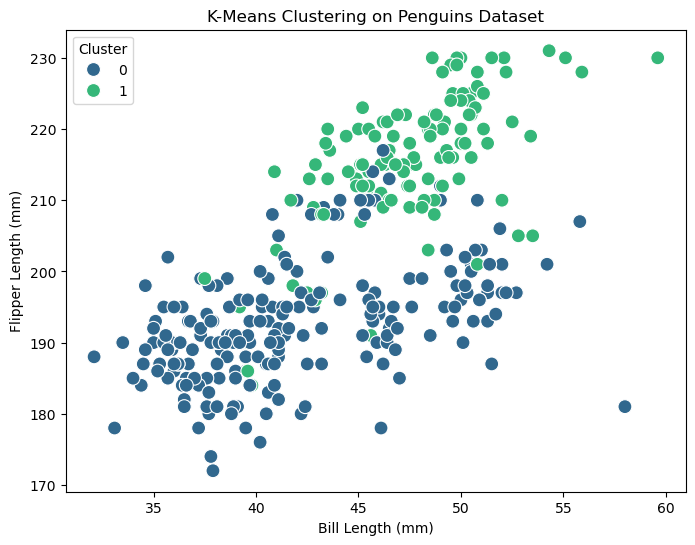

In [9]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x = penguin_data["bill_length_mm"], y = penguin_data["flipper_length_mm"], hue = penguin_data["Cluster"], palette="viridis", s=100)

plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("K-Means Clustering on Penguins Dataset")
plt.legend(title="Cluster")
plt.show()

#### Evaluation of Cluster

In [10]:
print('Inertia of Cluster              :', k_means.inertia_)
print('Silhouette Score of Cluster     :', silhouette_score(X_penguin_data, k_means.labels_))
print('Davies Bouldin Score of Cluster :', davies_bouldin_score(X_penguin_data, k_means.labels_))

Inertia of Cluster              : 57585829.38387767
Silhouette Score of Cluster     : 0.6305757541694128
Davies Bouldin Score of Cluster : 0.5002738344727324


Here Inertia is high because value range is big, otherwise clustering is good based on Silhouette and Davies Bouldin Score.

### Scalling Data

In [11]:
scaler = StandardScaler()
X_scaled_penguin = scaler.fit_transform(X_penguin_data)

In [12]:
k_means_scaled = KMeans(n_clusters = 2, random_state=2744)
k_means_scaled.fit(X_scaled_penguin)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=2744)

#### Cluster Centers

In [13]:
k_means_scaled.cluster_centers_

array([[-0.36409445,  0.61318738, -0.64641637, -0.61235553],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078]])

#### Evaluation of Clusters

In [14]:
print('Inertia of Cluster              :', k_means_scaled.inertia_)
print('Silhouette Score of Cluster     :', silhouette_score(X_scaled_penguin, k_means_scaled.labels_))
print('Davies Bouldin Score of Cluster :', davies_bouldin_score(X_scaled_penguin, k_means_scaled.labels_))

Inertia of Cluster              : 552.6710215353658
Silhouette Score of Cluster     : 0.5308173701641073
Davies Bouldin Score of Cluster : 0.7152803751199596


## Principal component analysis (PCA)

#### Preparing Data

In [15]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
X_pca = country_data.iloc[:, 1:8]
y_pca = country_data['gdpp']

#### Scalling

In [17]:
X_pca = scaler.fit_transform(X_pca)

#### Applying PCA

In [18]:
pca = PCA(n_components = 2)
after_pca = pca.fit_transform(X_pca)

In [19]:
pca_df = pd.DataFrame(after_pca, columns = ['PC1', 'PC2'])

In [20]:
pca_df.head()

,PC1,PC2
0,-2.260407,0.165759
1,0.309301,-0.552512
2,-0.196068,-0.387944
3,-2.147040,1.852047
4,1.035825,0.026052


#### Visualizing PCA

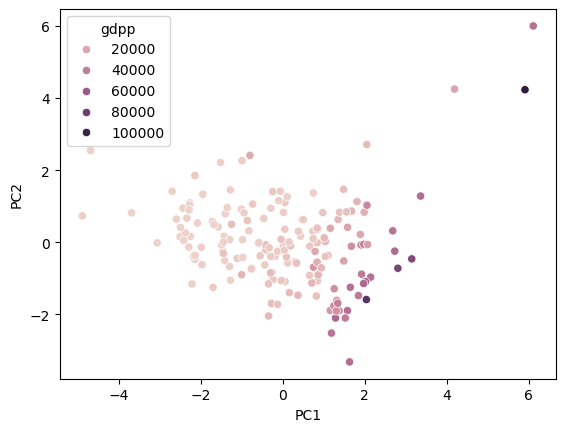

In [21]:
sns.scatterplot(pca_df, x = pca_df['PC1'], y = pca_df['PC2'], hue = country_data['gdpp'])
plt.show()

#### Performing Random Clustering

In [22]:
k_pca = KMeans(n_clusters = 3)
country_data['Cluster'] = k_pca.fit_predict(pca_df)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


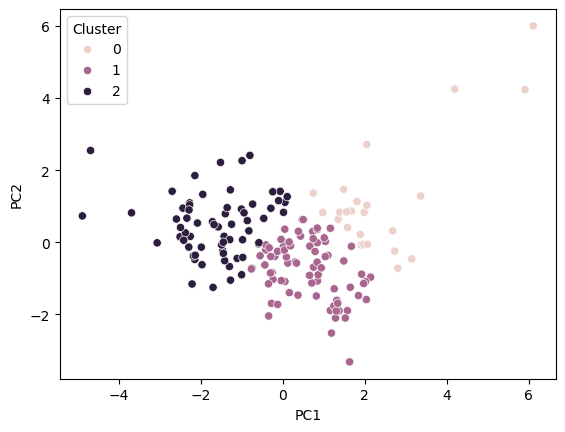

In [23]:
sns.scatterplot(pca_df, x = pca_df['PC1'], y = pca_df['PC2'], hue = country_data['Cluster'])
plt.show()